<a href="https://colab.research.google.com/github/harshit57709/Hack3.0/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 





In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

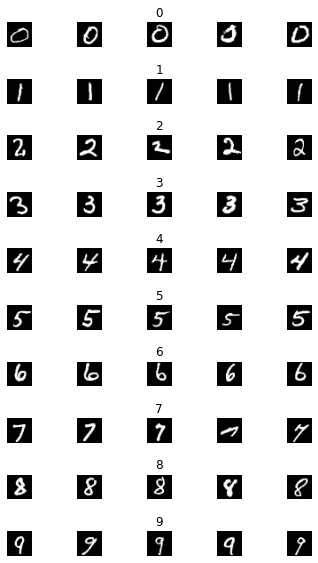

In [0]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


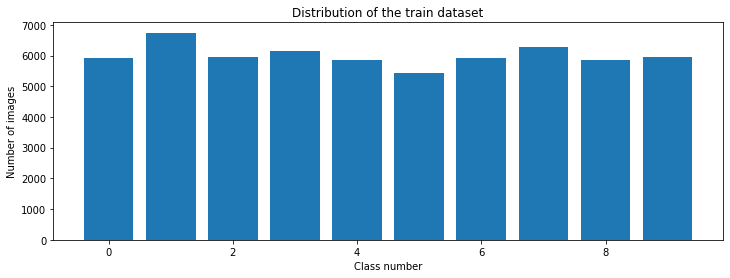

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
#definig the leNet model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size= (2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [0]:
model = leNet_model()

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)              

In [0]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.1, batch_size=400, shuffle=1, verbose =True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 26us/step - loss: 0.2578 - accuracy: 0.9185 - val_loss: 0.0540 - val_accuracy: 0.9850
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0447 - val_accuracy: 0.9860
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0537 - val_accuracy: 0.9865
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0394 - val_accuracy: 0.9893
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0487 - accuracy: 0.9845 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 7/10
54000/54000 [==============================] - 1s 20us/ste

(0.0, 0.2)

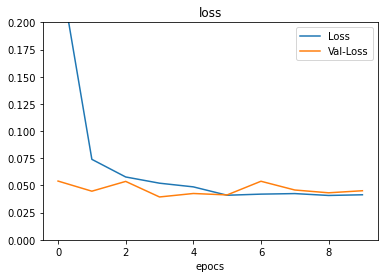

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss","Val-Loss"])
plt.xlabel("epocs")
plt.title("loss")
plt.ylim((0,0.2))

In [0]:
# plt.figure(figsize=(8,8))
# plt.plot(history.history["accuracy"])
# plt.plot(history.history["val_accuracy"])
# plt.legend(["acc","Val-acc"])
# plt.xlabel("epocs")
# plt.title("acc")
# plt.ylim((.93,1))

(0.93, 1.0)

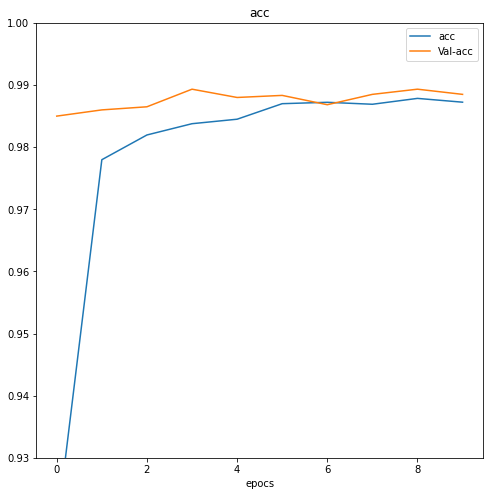

In [0]:
plt.figure(figsize=(8,8))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["acc","Val-acc"])
plt.xlabel("epocs")
plt.title("acc")
plt.ylim((.93,1))

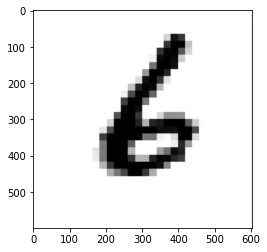

In [0]:
import requests
from PIL import Image

url = 'https://i.stack.imgur.com/Ds5Rc.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)





In [0]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (28, 28))


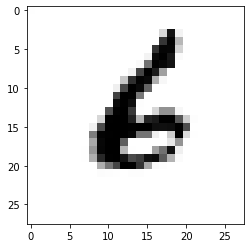

In [0]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap = plt.get_cmap("gray"))

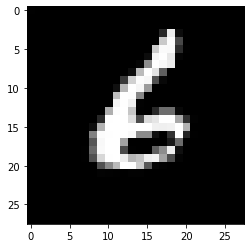

In [0]:
final_image = cv2.bitwise_not(img)
plt.imshow(final_image, cmap = plt.get_cmap("gray"))                                                  

In [0]:
final_image = final_image/255
final_image = final_image.reshape(1,28, 28, 1)
final_image.shape

(1, 28, 28, 1)

In [0]:
prediction = model.predict_classes(final_image)
print("prediction is", str(prediction))

prediction is [6]


In [0]:
score = model.evaluate(X_test, y_test)
print("test score : ", score[0])
print("test accuracy : ", score[1])

10000/10000 [==============================] - 1s 65us/step
test score :  0.044358572140929024
test accuracy :  0.9866999983787537


In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs= model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs= model.layers[3].output)



In [0]:
visual_layer1 = layer1.predict(final_image)

In [0]:
visual_layer2 = layer2.predict(final_image)

In [0]:
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 5, 5, 15)


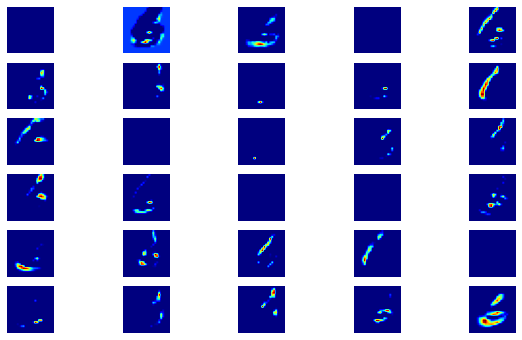

In [0]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0,:, :, i], cmap = plt.get_cmap("jet"))
  plt.axis('off')

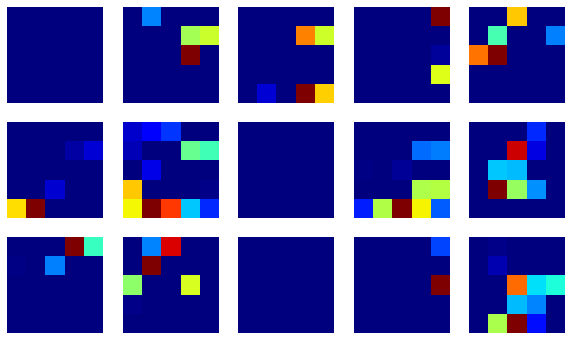

In [0]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0,:, :, i], cmap = plt.get_cmap("jet"))
  plt.axis('off')